## DATA 620 Project 2

### Gabrielle Bartomeo, Zach Dravis, Peter Lombardo, and Hovig Ohannessian 

* Libraries

In [144]:
import pandas as pd
import zipfile
import requests
import io
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from pandas import *

* Weather Data

In [145]:
rides_weather = pd.read_csv('https://query.data.world/s/uvmgp6hbzytw2gt7yiwr4dbxzdakpj')
#rides_weather.head()

* Rides Data A 

In [146]:
rides_a = pd.read_csv('https://query.data.world/s/g47xbkg3i2el2xnkyrbimxpa7czljy')
#rides_a.info

* Rides Data B

In [147]:
rides_b = pd.read_csv('https://query.data.world/s/y7wfzxx3xv6ko6g4ihr73ryrm3uq4u')
#rides_b.info

In [148]:
#combined_rides = rides_weather.join(rides_a, on=rides_a.loc(rides_a['RIDE_ID'].tolist())).join(rides_b, on=rides_b[rides_b['RIDE_ID'].tolist()))
combined_rides = pd.concat([rides_a, rides_b, rides_weather], axis=1, join='inner')
print(combined_rides.shape)

(1494125, 61)


In [149]:
combined_rides.head()

,RIDE_ID,started_on,created_date,updated_date,completed_on,distance_travelled,end_location_lat,end_location_long,driver_rating,rider_rating,...,HOURLYPrecip,DAILYMaximumDryBulbTemp,DAILYMinimumDryBulbTemp,DAILYDeptFromNormalAverageTemp,DAILYAverageRelativeHumidity,DAILYSunrise,DAILYSunset,DAILYPrecip,DAILYAverageWindSpeed,DAILYPeakWindSpeed
0,0,2016-06-04 00:18:49-05:00,2016-06-04 00:10:19-05:00,2016-06-04 00:27:48-05:00,2016-06-04 00:27:32-05:00,8459.0,38.676,-121.039,5.0,5.0,...,0.0,NaN,NaN,NaN,NaN,529.0,1930.0,1.63,NaN,NaN
1,1,2016-06-04 01:50:12-05:00,2016-06-04 01:47:39-05:00,2016-06-04 01:52:00-05:00,2016-06-04 01:51:49-05:00,443.0,38.676,-121.039,5.0,5.0,...,0.0,NaN,NaN,NaN,NaN,529.0,1930.0,NaN,NaN,NaN
2,2,2016-06-04 03:16:02-05:00,2016-06-04 03:13:07-05:00,2016-06-04 03:18:07-05:00,2016-06-04 03:17:57-05:00,568.0,38.676,-121.039,3.0,5.0,...,NaN,NaN,NaN,NaN,NaN,529.0,1930.0,NaN,NaN,NaN
3,3,2016-06-04 10:05:13-05:00,2016-06-04 09:52:35-05:00,2016-06-04 10:14:00-05:00,2016-06-04 10:13:38-05:00,4051.0,30.271,-97.742,5.0,5.0,...,0.0,NaN,NaN,NaN,NaN,529.0,1930.0,NaN,NaN,NaN
4,4,2016-06-04 10:24:25-05:00,2016-06-04 10:23:25-05:00,2016-06-04 10:26:16-05:00,2016-06-04 10:26:07-05:00,790.0,30.269,-97.752,5.0,5.0,...,0.0,NaN,NaN,NaN,NaN,529.0,1930.0,NaN,NaN,NaN


In [150]:
rides_fares = DataFrame(combined_rides.describe().T)
rides_fares

,count,mean,std,min,25%,50%,75%,max
RIDE_ID,1494125.0,747062.000000,431316.879814,0.000,373531.000,747062.000,1120593.000,1.494124e+06
distance_travelled,1494123.0,8768.291020,46866.126002,0.000,3192.000,5843.000,11862.000,4.302576e+07
end_location_lat,1494125.0,30.275625,0.107421,0.000,30.252,30.267,30.289,5.001900e+01
end_location_long,1494125.0,-97.740290,0.299304,-121.039,-97.752,-97.742,-97.727,1.989800e+01
driver_rating,1355725.0,4.819677,0.653058,0.000,5.000,5.000,5.000,5.000000e+00
rider_rating,1468193.0,4.886073,0.546914,0.000,5.000,5.000,5.000,5.000000e+00
active_driver_id,1494125.0,333976.259366,199544.150537,0.000,158288.000,328407.000,507199.000,6.875150e+05
charity_id,369561.0,16.250026,12.403195,1.000,5.000,12.000,25.000,6.200000e+01
free_credit_used,225394.0,9.482085,6.177915,0.000,5.560,8.820,13.000,1.034600e+02
surge_factor,1494125.0,1.097513,0.408934,0.000,1.000,1.000,1.000,6.000000e+00


In [151]:
fare_data = pd.pivot_table(combined_rides, index = ['rider_id'][0], values = ['total_fare'], aggfunc = [np.sum, len])
fare_data['only_local'] = 0
fare_data.columns = fare_data.columns.droplevel(-1)
fare_data['only_local'] = fare_data['len'].apply(lambda x: 1 if x > 5 else 0)
fare_data[fare_data.only_local == 1]

,sum,len,only_local
rider_id,,,
2,6776.20,370.0,1
3,434.63,27.0,1
4,666.86,45.0,1
5,717.79,74.0,1
6,234.82,16.0,1
7,136.22,12.0,1
8,367.22,39.0,1
9,555.02,25.0,1
10,1406.00,144.0,1


In [152]:
fare_data['fare_range'] = pd.cut(fare_data['sum'], [0, 10, 25, 50, 75, 100, 125, 150, 200, 500, 750, 1000, 1500, 2000, 5000, 8000])
ax = (fare_df[fare_data.only_local == 1].groupby('fare_range').sum() / fare_data.groupby('fare_range').sum() * 100)['sum'].plot(kind='bar')
ax.set_title('% of Revenue From Austinites')
ax.set_xlabel('Customer Lifetime Value (Aggregated Total Fare)')
ax.set_ylabel('% of Austinites')

Text(0,0.5,'% of Austinites')

In [153]:
fare_data['fare_range']

rider_id
0             (25, 50]
1              (0, 10]
2         (5000, 8000]
3           (200, 500]
4           (500, 750]
5           (500, 750]
6           (200, 500]
7           (125, 150]
8           (200, 500]
9           (500, 750]
10        (1000, 1500]
11          (125, 150]
12          (500, 750]
13        (2000, 5000]
14          (500, 750]
15            (25, 50]
16          (200, 500]
17          (200, 500]
18        (2000, 5000]
19         (750, 1000]
20           (75, 100]
21        (2000, 5000]
22        (2000, 5000]
23        (1500, 2000]
24          (125, 150]
25         (750, 1000]
26          (500, 750]
27          (500, 750]
28          (200, 500]
29          (500, 750]
              ...     
260929        (10, 25]
260930        (10, 25]
260931        (10, 25]
260932        (10, 25]
260933        (10, 25]
260934        (10, 25]
260935        (10, 25]
260936        (10, 25]
260937        (25, 50]
260938        (25, 50]
260939         (0, 10]
260940        (25, 50]
26

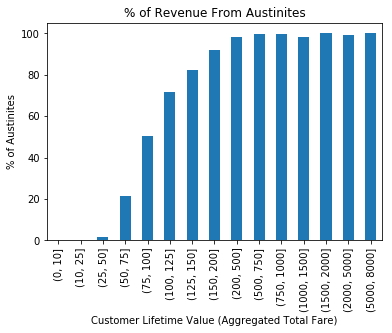

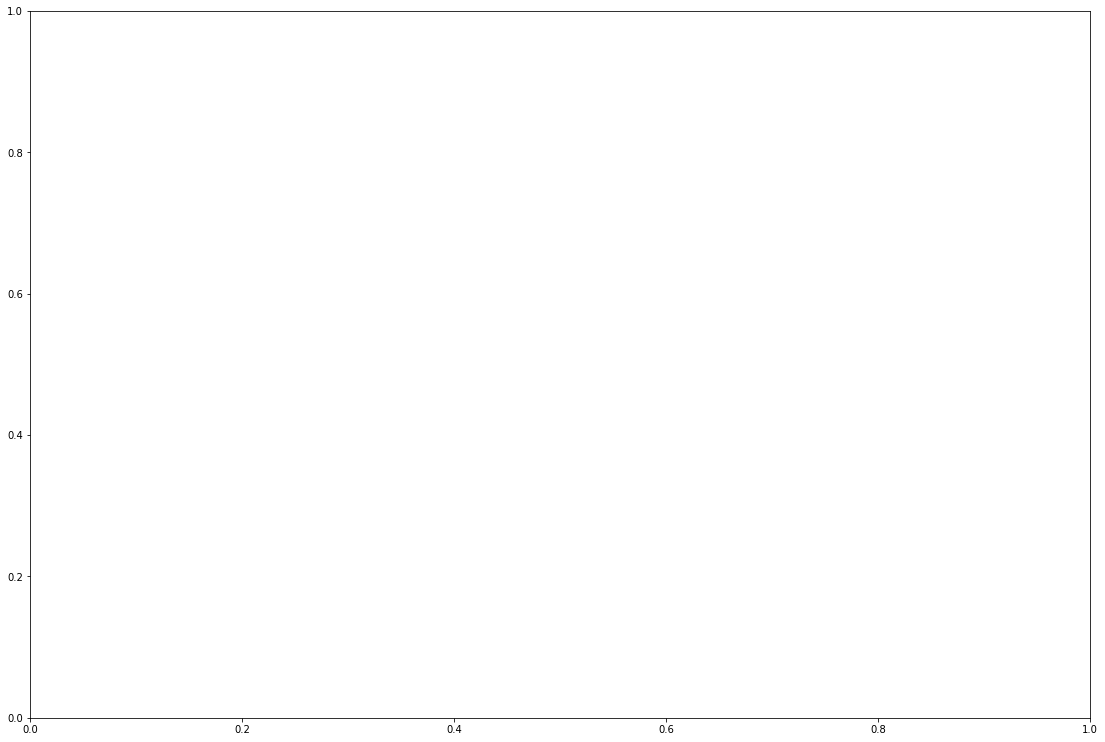

In [154]:
G = nx.Graph()
#G.add_edges_from(combined_rides['rider_id'].tolist())
#G.add_nodes_from(fare_data['fare_range'])
plt.figure(figsize=(19,13));
pos = nx.spring_layout(G,k=.12);
nx.draw_networkx_edges(G,pos, edge_color='b',alpha=.3);
nx.draw_networkx_nodes(G,pos,node_color='c',node_size=300);
plt.show()